# Chapter 5: Detecting and Recognizing Faces

This Jupyter Notebook allows you to interactively edit and run a subset of the code samples from the corresponding chapter in our book, *Learning OpenCV 5 Computer Vision with Python 3*.

Any Jupyter server should be capable of running the Notebook. For example, you can even run it in Google Colab by opening the following link in your Web browser: https://colab.research.google.com/github/PacktPublishing/Learning-OpenCV-5-Computer-Vision-with-Python-Fourth-Edition/blob/main/chapter05/chapter05.ipynb. Specifically, this link opens the Notebook's latest version, hosted on GitHub.

For additional code samples and instructions, please refer to the book and to the GitHub repository at https://github.com/PacktPublishing/Learning-OpenCV-5-Computer-Vision-with-Python-Fourth-Edition. Bear in mind that many of the book's code samples involve camera input or video input/output, which is not well suited to the Jupyter server environment, so there is more to explore beyond Jupyter!

## Running the compatibility script

**Do this first; otherwise, code in subsequent sections may hang.**

Run the following script, which provides a compatibility layer between OpenCV and Jupyter:

In [4]:
# %load ../compat/jupyter_compat.py
import cv2
from IPython import display
import PIL.Image


def cv2_imshow(winname, mat):
    mat = mat.clip(0, 255).astype('uint8')
    if mat.ndim == 3:
        if mat.shape[2] == 4:
            mat = cv2.cvtColor(mat, cv2.COLOR_BGRA2RGBA)
        else:
            mat = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)
    display.display(PIL.Image.fromarray(mat))

cv2.imshow = cv2_imshow


def cv2_waitKey(delay=0):
    return -1

cv2.waitKey = cv2_waitKey


What did we just do? We imported OpenCV and we replaced some of OpenCV's I/O functions with our own Jupyter-compatible functions that do not rely on a windowed environment.

## Performing face detection on a still image

Let's experiment with an old but good (computationally cost-effective) detection technique: the use of Haar cascades.

Run the following script, which uses Haar cascades to try to detect human faces in an image of logs and woodcutters:

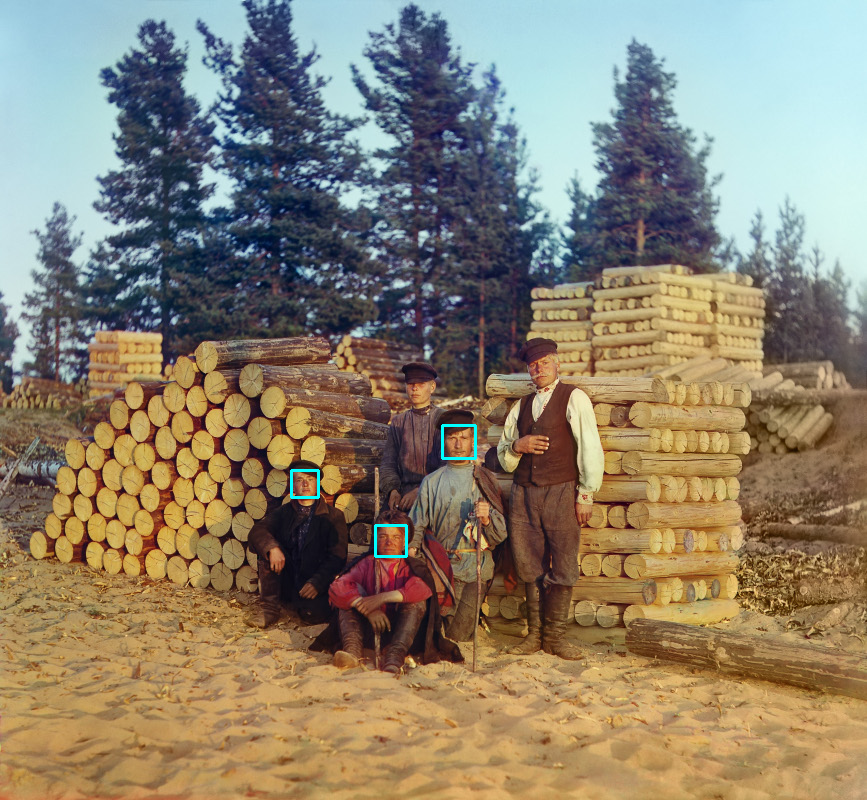

-1

In [3]:
# %load face_detection_still.py
import cv2


face_cascade = cv2.CascadeClassifier(
    './cascades/haarcascade_frontalface_default.xml')
img = cv2.imread('../images/woodcutters.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.08, 5)
for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)
  
cv2.imshow('Woodcutters Detected!', img)
cv2.imwrite('./woodcutters_detected.png', img)
cv2.waitKey(0)


You probably see that some but not all of the woodcutters' faces were detected. Try fine-tuning the parameters of `detectMultiScale` to see whether the detection results get better or worse. What types of objects in this image tend to produce false positive detections?

# Summary

That is all for now! Please refer to the book and to the GitHub repository for several samples of face detection and recognition using webcam input.